In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# local_zip = '/tmp/cats_and_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

base_dir = '/run/media/ap_tech/ap@tech/DeepLearing_AI/CNN_IN_TENSORFLOW/cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 - 57s - loss: 0.6911 - accuracy: 0.5305 - val_loss: 0.6740 - val_accuracy: 0.6340
Epoch 2/100
100/100 - 43s - loss: 0.6567 - accuracy: 0.6120 - val_loss: 0.6435 - val_accuracy: 0.6420
Epoch 3/100
100/100 - 45s - loss: 0.6121 - accuracy: 0.6640 - val_loss: 0.6391 - val_accuracy: 0.6200
Epoch 4/100
100/100 - 46s - loss: 0.5621 - accuracy: 0.7085 - val_loss: 0.6173 - val_accuracy: 0.6890
Epoch 5/100
100/100 - 55s - loss: 0.5304 - accuracy: 0.7300 - val_loss: 0.5882 - val_accuracy: 0.6920
Epoch 6/100
100/100 - 91s - loss: 0.4925 - accuracy: 0.7565 - val_loss: 0.5700 - val_accuracy: 0.7110
Epoch 7/100
100/100 - 83s - loss: 0.4708 - accuracy: 0.7685 - val_loss: 0.5420 - val_accuracy: 0.7220
Epoch 8/100
100/100 - 93s - loss: 0.4284 - accuracy: 0.7960 - val_loss: 0.5571 - val_accuracy: 0.7140
Epoch 9/100
100/100 - 88s - loss: 0.4046 - accuracy: 0.81

Epoch 80/100
100/100 - 92s - loss: 0.0041 - accuracy: 0.9985 - val_loss: 2.2305 - val_accuracy: 0.7240
Epoch 81/100
100/100 - 104s - loss: 3.5402e-04 - accuracy: 1.0000 - val_loss: 2.2755 - val_accuracy: 0.7470
Epoch 82/100
100/100 - 112s - loss: 0.0074 - accuracy: 0.9980 - val_loss: 2.2813 - val_accuracy: 0.7340
Epoch 83/100
100/100 - 117s - loss: 0.0076 - accuracy: 0.9975 - val_loss: 2.3900 - val_accuracy: 0.7290
Epoch 84/100
100/100 - 79s - loss: 5.8957e-05 - accuracy: 1.0000 - val_loss: 2.3572 - val_accuracy: 0.7370
Epoch 85/100
100/100 - 58s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 2.3752 - val_accuracy: 0.7330
Epoch 86/100
100/100 - 56s - loss: 0.0149 - accuracy: 0.9960 - val_loss: 2.2258 - val_accuracy: 0.7350
Epoch 87/100
100/100 - 55s - loss: 4.5594e-05 - accuracy: 1.0000 - val_loss: 2.3943 - val_accuracy: 0.7480
Epoch 88/100
100/100 - 55s - loss: 0.0108 - accuracy: 0.9965 - val_loss: 2.4169 - val_accuracy: 0.7390
Epoch 89/100
100/100 - 63s - loss: 5.8982e-04 - accuracy: 

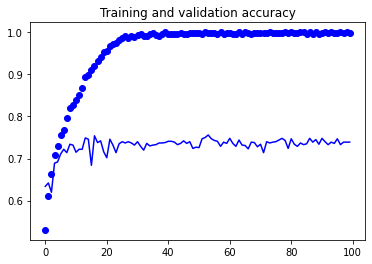

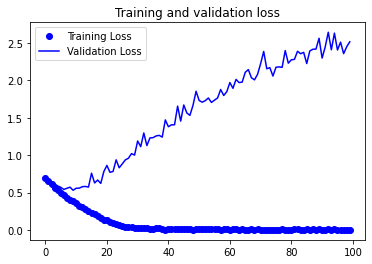

In [3]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# local_zip = '/tmp/cats_and_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

base_dir = '/run/media/ap_tech/ap@tech/DeepLearing_AI/CNN_IN_TENSORFLOW/cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 - 79s - loss: 0.6973 - accuracy: 0.5095 - val_loss: 0.6857 - val_accuracy: 0.5240
Epoch 2/100
100/100 - 54s - loss: 0.6908 - accuracy: 0.5325 - val_loss: 0.6744 - val_accuracy: 0.6190
Epoch 3/100
100/100 - 51s - loss: 0.6828 - accuracy: 0.5475 - val_loss: 0.6603 - val_accuracy: 0.6140
Epoch 4/100
100/100 - 51s - loss: 0.6718 - accuracy: 0.5780 - val_loss: 0.6852 - val_accuracy: 0.5240
Epoch 5/100
100/100 - 55s - loss: 0.6616 - accuracy: 0.6075 - val_loss: 0.6168 - val_accuracy: 0.6760
Epoch 6/100
100/100 - 54s - loss: 0.6525 - accuracy: 0.6290 - val_loss: 0.6183 - val_accuracy: 0.6610
Epoch 7/100
100/100 - 50s - loss: 0.6375 - accuracy: 0.6375 - val_loss: 0.5888 - val_accuracy: 0.6960
Epoch 8/100
100/100 - 49s - loss: 0.6220 - accuracy: 0.6515 - val_loss: 0.6300 - val_accuracy: 0.6320
Epoch 9/100
100/100 - 51s - loss: 0.6191 - accuracy: 0.65

Epoch 80/100
100/100 - 52s - loss: 0.4115 - accuracy: 0.8055 - val_loss: 0.4403 - val_accuracy: 0.7840
Epoch 81/100
100/100 - 53s - loss: 0.4155 - accuracy: 0.8080 - val_loss: 0.4359 - val_accuracy: 0.7990
Epoch 82/100
100/100 - 51s - loss: 0.4192 - accuracy: 0.8010 - val_loss: 0.4285 - val_accuracy: 0.7870
Epoch 83/100
100/100 - 50s - loss: 0.4180 - accuracy: 0.8095 - val_loss: 0.4195 - val_accuracy: 0.8070
Epoch 84/100
100/100 - 52s - loss: 0.4135 - accuracy: 0.7975 - val_loss: 0.4395 - val_accuracy: 0.7870
Epoch 85/100
100/100 - 51s - loss: 0.4101 - accuracy: 0.8190 - val_loss: 0.3897 - val_accuracy: 0.8110
Epoch 86/100
100/100 - 51s - loss: 0.4113 - accuracy: 0.8030 - val_loss: 0.4398 - val_accuracy: 0.7910
Epoch 87/100
100/100 - 51s - loss: 0.4045 - accuracy: 0.8215 - val_loss: 0.4263 - val_accuracy: 0.7990
Epoch 88/100
100/100 - 52s - loss: 0.4018 - accuracy: 0.8075 - val_loss: 0.3882 - val_accuracy: 0.8160
Epoch 89/100
100/100 - 50s - loss: 0.3998 - accuracy: 0.8235 - val_loss: 

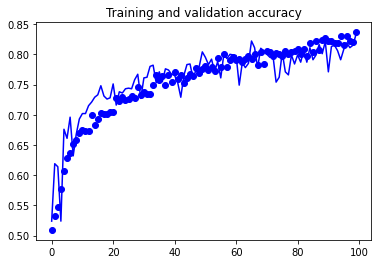

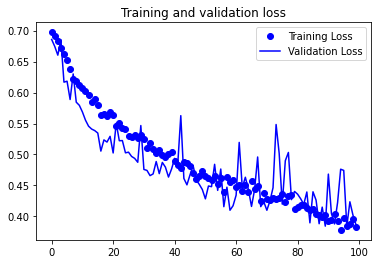

In [2]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()